<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Introduction_To_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction To PCA

##Principal Component Analysis (PCA)



Imagine you are a birdwatcher with a binocular, watching a flock of birds flying. Through the binoculars, you see the birds from all different angles and perspectives. But what if there's one particular angle that gives you the best view, where you can see the maximum spread of the flock? That's essentially what PCA helps us find - the best viewpoint to see and understand the data.

### Key Concepts:

1. **Dimensionality Reduction**: PCA is mainly used to reduce the number of features in a dataset. It does so by finding new features that are combinations of the old ones. These new features are the principal components.

2. **Variance & Information**: The first principal component captures the most variance (or spread) in the data. The second one (which is orthogonal to the first) captures the second most, and so on. By variance, we mean the extent to which data points differ from the mean.

3. **Eigenvectors & Eigenvalues**: When we talk about "finding the best angle or viewpoint", mathematically, we're finding eigenvectors. Each eigenvector represents a direction in our data. The corresponding eigenvalue tells us how "important" that direction is (i.e., how much variance it captures).

4. **Transformation**: Once the principal components are found, the data can be transformed. This means representing the original data in terms of these components.

### Usage in Machine Learning:

1. **Data Visualization**: When you have data with many features, it's hard to visualize. PCA can help by reducing the data to 2 or 3 principal components which can be plotted easily.

2. **Speeding up Algorithms**: Training algorithms can be slow with high-dimensional data. PCA can speed things up by reducing dimensionality.

3. **Noise Reduction**: By focusing on the main components of variance, PCA can help filter out noise.

4. **Improving Model Performance**: Sometimes models overfit when there are too many features. By reducing these, PCA can lead to better model generalization.

### Caveats:

1. **Loss of Interpretability**: The principal components don't have a clear meaning like original features. It can make results harder to interpret.

2. **Not always the best for Dimensionality Reduction**: Depending on the data and the problem, other techniques (like t-SNE or UMAP for visualization) might be more appropriate.

To wrap up, think of PCA as a technique to find the best perspective to look at your data, ensuring you see its main features clearly, without all the unnecessary details. It's like finding the best viewpoint to enjoy a landscape, allowing you to focus on the main attractions without distractions.

##Covariance


Covariance measures the degree to which two variables change together. If the variables tend to increase and decrease simultaneously, the covariance is positive. If one variable tends to increase when the other decreases, the covariance is negative.

**Simple Formula for Covariance between two variables \(X\) and \(Y\):
```
Cov(X,Y) = sum((X_i - X.mean())(Y_i - Y.mean())) / n-1
```
Where:
- X_i and Y_i are individual data points.
- n is the number of data points.

The formula is computing the product of (X_i - X.mean())(Y_i - Y.mean()) for each data point i, and then summing all of these products together.

### Covariance Matrix:

The covariance matrix is a square matrix that contains the covariances between pairs of variables. If you have D features, the covariance matrix will be D * D.

For a dataset with two features X and Y, the covariance matrix will be:
\[
\begin{bmatrix}
\text{Cov}(X,X) & \text{Cov}(X,Y) \\
\text{Cov}(Y,X) & \text{Cov}(Y,Y) \\
\end{bmatrix}
\]

Where:
- Cov(X,X) is the variance of X.
- Cov(Y,Y) is the variance of Y.
- Cov(X,Y) is the covariance between X and Y.

### `np.cov`:

In NumPy, the `np.cov` function can compute the covariance matrix for you. For instance, if `M` is your data where each row is a feature and each column is an observation, `np.cov(M)` will give you the covariance matrix.

### PCA and Covariance Matrix:

PCA is about finding the directions (or axes) in the dataset that maximize variance. The eigenvectors of the covariance matrix represent these directions. The eigenvalues associated with these eigenvectors represent the magnitude of the variance in these directions.

1. **Step 1**: Start by centering the data (subtracting the mean).
2. **Step 2**: Calculate the covariance matrix.
3. **Step 3**: Compute the eigenvectors and eigenvalues of the covariance matrix.
4. **Step 4**: Sort eigenvectors by their eigenvalues in descending order.
5. **Step 5**: Choose the first \(k\) eigenvectors (where \(k\) is the number of dimensions you want to reduce your data to).
6. **Step 6**: Transform the original dataset with these \(k\) eigenvectors to get the PCA-transformed data.

The reason the covariance matrix is central to PCA is that it encapsulates the relationships between all features. The eigenvectors (principal components) of this matrix tell us the directions where the data varies the most.

##Step By Step

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("cancer_tumor_data_features.csv")

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

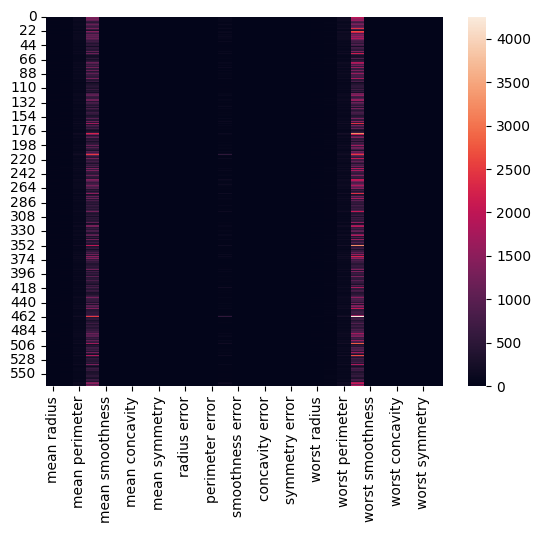

In [6]:
#without scaling, most of the features are too "weak" to show
sns.heatmap(df)

##Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

<Axes: >

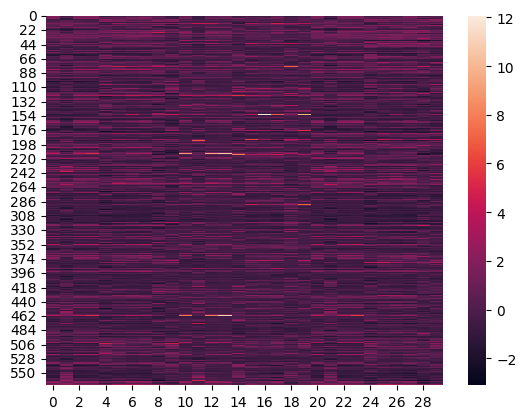

In [12]:
sns.heatmap(scaled_df) ##Still very hard to interpret

In [ ]:
scaled_df.mean(axis=1)

##Create Covariance Matrix

When you provide `np.cov` with a matrix (like a DataFrame with \( n \) columns), it returns the covariance matrix of the columns.

The covariance matrix \( C \) is a square matrix of size \( n \times n \), where the element at the \( (i,j) \) position represents the covariance between column \( i \) and column \( j \) of your original matrix (or DataFrame).

Here's a more detailed breakdown:

1. The diagonal entries of the covariance matrix represent the variances of each individual column. So, \( C_{ii} \) (the \( i^{th} \) diagonal element) is the variance of column \( i \).

2. The off-diagonal entries are the covariances between different columns. So, \( C_{ij} \) (where \( i \neq j \)) is the covariance between column \( i \) and column \( j \).

Thus, if you have a DataFrame with \( n \) columns, `np.cov` will return an \( n \times n \) covariance matrix where:

- The diagonal elements represent the variance of each individual column.
- The off-diagonal elements represent the covariances between the columns.

Note: Ensure that the input to `np.cov` has variables (or columns in the context of a DataFrame) as columns and observations as rows. If using pandas, you might want to transpose the DataFrame using `.T` if needed.

In [24]:
covariance_mtx = np.cov(scaled_df, rowvar=False)

##Create Eigenvalues and Eigenvectors

In [25]:
eig_values, eig_vectors = np.linalg.eig(covariance_mtx)

In [26]:
num_components = 2

In [27]:
sorted_components = np.argsort(eig_values)[::-1][:num_components]

In [28]:
eig_values = eig_values[sorted_components]
eig_vectors = eig_vectors[:, sorted_components]

In [29]:
scaled_df.shape, eig_vectors.shape

((569, 30), (30, 2))

In [30]:
principal_components = np.dot(scaled_df, eig_vectors)

In [31]:
principal_components.shape

(569, 2)

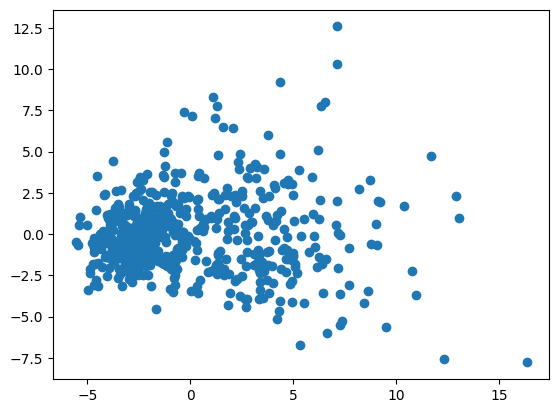

In [34]:
plt.scatter(principal_components[:,0],principal_components[:,1])

##Using sklearn